<img src="res/itm_logo.jpg" width="300px">

## Inteligencia Artificial - IAI84
### Instituto Tecnológico Metropolitano
#### Pedro Atencio Ortiz - 2019

Este material ha sido construido utilizando material de los libros:
<ul>
    <li>Artificial Intelligence: A modern approach.</li>
    <li>Artificial Intelligence: Foundations of Computational Agents. Second Edition. (<a href="http://artint.info/2e/html/ArtInt2e.html">link</a>).</li>
</ul>

<hr>
## Módulo 2.2: Búsqueda...más allá de la aproximación clásica
<img src="res/problem_solving.gif" width="400px">
## Agenda:
<font size="4">
<ol>
<li><b>Búsqueda y problemas de optimización</b></li>
<li><b>Simulated Annealing</b></li>
<li>Algoritmos bio-inspirados: algoritmos genéticos</li>
</ol>
</font>

<hr>
# 1. Búsqueda y problemas de optimización
<ul>
    <li>Un problema de optimización se puede entender como un problema de búsqueda con restricciones.</li>
    <li>A diferencia de la búsqueda tradicional que considera un estado objetivo, la optimización considera una serie de restricciones.</li>
    <li>En la optimización se hace una búsqueda en el espacio de parámetros del problem, tal que maximicen o minimicen una función.</li>
</ul>
<br>
<img src="res/more/sum_of_gaussians.png" width="400">

<hr>
# 2. Simulated Annealing
Es una técnica de búsqueda inspirada en el estudio del recocido y enfriamiento de materiales.

Las propiedades estructurales de un sólido dependen de la tasa de enfriamiento después de que el sólido ha sido calentado por encima del punto de fusión.  Si el sólido se enfría lentamente, se pueden formar grandes estructuras cristalinas, las cuáles brindan propiedades benéficas para el sólido.  Sin embargo, cuando el sólido se enfría de manera descontrolada, el resultado es una estructura frágil con propiedades no deseables.

<ul>
<li>A mayor temperatura, mayor energía.</li>
<li>A menor temperatura, menor energía.</li>
<li>Las combinaciones más abruptas se generan a mayor energía.</li>
</ul>

Ejemplo conceptual: un objeto moviéndose por el agua puede hacerlo de forma más rápida y por ende alcanzar un mayor número posiciones cuando el agua es caliente.  Sin embargo, a medida que el agua comienza a bajar de temperatura hasta solidificarse, el objeto tendrá menos posibilidad de moverse libremente.
<br>
<img src="res/more/simulated_annealing.gif" width="600px">
<center><i>Simulated Anneling.</i></center>

<hr>
<img src="res/more/sim_alg.png">

<hr>
En el enfriamiento simulado, se trata de minimizar la energía de la solución, haciendo la comparación entre un objeto caliente (inicial) y un objeto frío (final), el cuál tendrá menor energía.

Para reemplazar una solución entonces, se evalúa si la nueva solución tiene menor o igual energía (mejor) que la actual, y de ser así, se reemplaza la solución actual por la nueva.

Si por el contrario, la solución actual tiene mayor energía que la actual, se procede a decidir si se mantiene la solución o no de acuerdo a una probabilidad dada por:

<center><font color="blue" size=6>$P(\delta E)=e^{\frac{-\delta E}{T}}$</font></center>

De acuerdo a la ecuación anterior, a medida que la temperatura disminuye, la probabilidad de aceptar una solución peor es menor.  Lo anterior asegura que a mayor temperatura la posibilidad de explorar nuevas soluciones sea mayor.
<br>
<img src="res/more/temp_delta.png" width=400>

In [23]:
import numpy as np

delta_E = 5
T_start = 100
T_end = 0

P_list = []

for T in np.linspace(T_start,T_end,100):
    P = np.exp(-delta_E/T)
    P_list.append(P)
    #print(P)

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in double_scalars


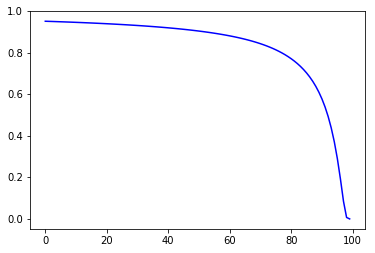

In [24]:
import matplotlib.pyplot as plt

plt.plot(P_list, 'b')
plt.show()

<hr>
La temperatura del sistema se reduce a una tasa constante ($\alpha$), después de haber iterado $n$ veces para el mismo valor de temperatura (Monte Carlo).

<center><font color="blue" size=6>$T_{i+1}=\alpha T_i$</font></center>

<hr>
Utilicemos esta técnica para resolver el problema de las N-reinas que consiste en ubicar N reinas en un tablero de ajedrez de tamaño NxN sin que estas se crucen en ningún momento.

Al igual que en algoritmos genéticos, el problema inicial de la solución, es la forma en que esta se codifica, para este caso se puede utilizar un arreglo de enteros: [3, 7, 2, 8, 5, 1, 4, 6]
<br>
<img src="res/more/n_reinas.png" width=300>

In [ ]:
#==============================================================================
#           UTILIDADES - INFRAESTRUCTURA
#==============================================================================


class solutionType: 
    '''
    Clase solutionType
    
    Esta clase almacena un array table y una energia energy.
    '''
    def __init__(self):
        self.table =  np.zeros(MAX_LENGTH, dtype=np.int)
        self.energy = 100.0


def initializeSolution(solution):
    '''
    Esta funcion inicializa la solucion.
    
    INPUT:
        solution: Un objeto de la clase solutionType.
    '''
    for i in range(MAX_LENGTH):
        solution.table[i] = i

    #perturbamos el tablero de forma aleatoria
    for i in range(MAX_LENGTH):
        tweakSolution(solution)

def tweakSolution(solution):
    '''
    Alterna valores del vector de solucion. Este metodo equivale
    a perturbar la solucion.
    
    INPUT:
        solution: Un objeto de la clase solutionType.
    '''
    #print(solution.table)
    x = np.round(np.random.rand() * (MAX_LENGTH-1))

    y = np.round( np.random.rand() * (MAX_LENGTH-1) )
    
    while (x == y):
        y = np.round( np.random.rand() * (MAX_LENGTH-1) )

    x_int = int(x)
    y_int = int(y)

    temp = solution.table[x_int]
    solution.table[x_int] = solution.table[y_int]
    solution.table[y_int] = temp
    #solution.table = np.random.permutation(solution.table)

    #print(solution.table)

def computeEnergy(solution):
    '''
    Funcion a optimizar.
    
    En este punto determinamos los conflictos diagonales porque la forma
    en que inicializamos y alteramos la solucion, asegura que no se presentaran
    conflictos verticales u horizontales.
    
    INPUT:
        solution: Un objeto de la clase solutionType.
    '''
    board = np.zeros([MAX_LENGTH, MAX_LENGTH])

    tempx = 0
    tempy = 0

    for i in range(MAX_LENGTH):
        board[i][solution.table[i]] = 1

    #print(board)

    conflicts = 0
    #direcciones de movimiento diagonales
    dx = np.array([-1, 1, -1, 1])
    dy = np.array([-1, 1, 1, -1])
    #nos movemos por todo el tablero y calculamos el numero de conflictos
    for i in range(MAX_LENGTH):
        x = i
        y = solution.table[i]

        #verificamos las diagonales
        for j in range(4):
            tempx = x
            tempy = y

            while(True):
                tempx += dx[j]
                tempy += dy[j]
                #si llega al principio o final del tablero
                if((tempx < 0) or (tempx >= MAX_LENGTH) or (tempy < 0) or (tempy >= MAX_LENGTH ) ):
                    break
                #si encuentra otra reina
                if(board[tempx][tempy] == 1):
                    conflicts += 1

    solution.energy = np.float(conflicts)

In [ ]:
#==============================================================================
#            METAPARAMETROS de SIMULATED ANNEALING
#==============================================================================

MAX_LENGTH = 7 #N para el problema de las N-reinas
INITIAL_TEMPERATURE = 100.0
FINAL_TEMPERATURE = 0.5
ALPHA = 0.85
STEPS_PER_CHANGE = 100 #numero de iteraciones por cada cambio de temperatura

In [ ]:
'''
N-Queens using simulated annealing.
Author: Pedro Atencio
'''

import numpy as np
import copy

#==============================================================================
#            SIMULATED ANNEALING
#==============================================================================
timer = 0
step = 0
#solution = False
useNew = False
accepted = 0

delta = 0.0

temperature = INITIAL_TEMPERATURE

current = solutionType()
working = solutionType()
best = solutionType()

initializeSolution(current)
computeEnergy(current)

working = copy.deepcopy(current)

while(temperature > FINAL_TEMPERATURE):
    #print('temperatura = ', temperature)
    accepted = 0

    #Monte Carlo
    for step in range(STEPS_PER_CHANGE):
        useNew = False

        tweakSolution(working)
        computeEnergy(working)

        #si la energia de la nueva solucion es menor que la actual
        if(working.energy <= current.energy):
            delta = working.energy - current.energy
            useNew = True
        else:
            test = np.random.rand() #random para estimar la probabilidad de elegir una solucion peor
            delta = working.energy - current.energy
            calc = np.exp(-delta / temperature)

            if(calc < test):
                useNew = True

        #hacemos la solucion seleccionada, la actual
        if(useNew):
            useNew = False
            current = copy.deepcopy(working)
            if(current.energy < best.energy):
                best = copy.deepcopy(current)
            else:
                working = copy.deepcopy(current)

    #actualizamos la temperatura
    temperature *= ALPHA

print(best.table, best.energy)

# Simulated Annealing - Conclusiones
<ul>
    <li>Algoritmo simple y de fácil implementación.</li>
    <li>La función de energía es equivalente a la función heurística de la búsqueda informada.</li>
    <li>Obtener el resultado esperado depende de los parametros iniciales, por lo que no se asegura un funcionamiento determinista.</li>
    <li>Configurar los parametros iniciales requiere un poco de "arte".</li>
    <li>Debido a la facilidad de implementación de algoritmo, puede ser una primera alternativa a explorar.</li>
</ul>